In [1]:

import numpy as np
import matplotlib.pyplot as plt


# 10 GeV WIMP

In [2]:
#sensitivity

sensitivity_file = '/global/cfs/cdirs/lz/users/rory_m/XLZD/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/sensitivity.txt'

data_array = np.loadtxt(sensitivity_file, delimiter="\t", skiprows=1)
sensitivies = data_array[:,0]
print(sensitivies, 'sensitivies')

# 1 sigma bands

lower_band = '/global/cfs/cdirs/lz/users/rory_m/XLZD/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/1_sigma_lower.txt'
lo_array = np.loadtxt(lower_band, delimiter="\t", skiprows = 1)
lower_band = sensitivies - lo_array[:,0]

upper_band = '/global/cfs/cdirs/lz/users/rory_m/XLZD/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/1_sigma_upper.txt'
up_array = np.loadtxt(upper_band, delimiter="\t", skiprows = 1)

upper_band = up_array[:,0] - sensitivies

#print(lower_band, upper_band)
y_err_1_sigma = np.vstack((lower_band, upper_band))

# 2 sigma bands

lower_band = '/global/cfs/cdirs/lz/users/rory_m/XLZD/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/2_sigma_lower.txt'
lo_array = np.loadtxt(lower_band, delimiter="\t", skiprows = 1)
lower_band = sensitivies - lo_array[:,0]

upper_band = '/global/cfs/cdirs/lz/users/rory_m/XLZD/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/2_sigma_upper.txt'
up_array = np.loadtxt(upper_band, delimiter="\t", skiprows = 1)
upper_band = up_array[:,0] - sensitivies

y_err_2_sigma = np.vstack((lower_band, upper_band))


#Header
with open(sensitivity_file, "r") as file:
    header_line = file.readline().strip()
    headers = header_line.split("\t")

print("Headers:", headers)

#Pb214 counts

# background_file = '/global/homes/r/rory_m/rory_m/FlameFitSimple/analyses/WIMP_discovery/Background_counts/Pb214_counts.txt'

# bkg_array = np.loadtxt(background_file, delimiter="\t", skiprows=1)
# bkg_counts = bkg_array
bkg_counts = np.array([0.1342, 0.9164, 1.7004, 6.0363, 10.3646])


[1.53350439e-48 1.46754210e-48 1.50251506e-48 1.55728928e-48
 1.48843595e-48] sensitivies
Headers: ['10 GeV', '60 GeV', '1000 GeV']


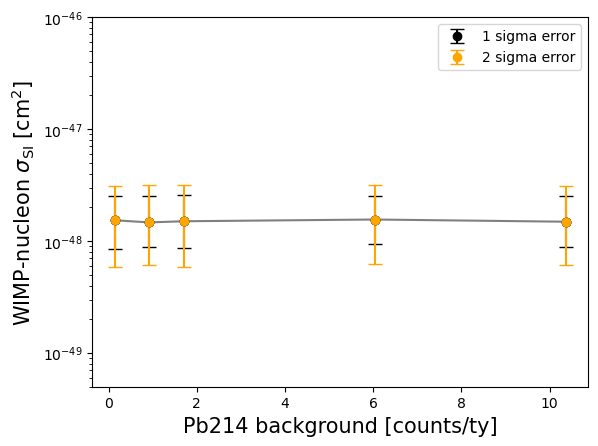

In [3]:
fig = plt.figure()
ax = fig.gca()

ax.plot(bkg_counts, sensitivies, color = 'grey')
ax.scatter(bkg_counts, sensitivies, color = 'black')
ax.errorbar(bkg_counts, sensitivies, yerr = y_err_1_sigma,  fmt='o', color = 'black', capsize = 5, label = '1 sigma error')
ax.errorbar(bkg_counts, sensitivies, yerr = y_err_2_sigma,  fmt='o', color = 'orange', capsize = 5, label = '2 sigma error')

ax.legend()
ylab = r'WIMP-nucleon $\sigma_{\rm SI}$ [cm$^2$]'
ylim = (5e-50, 1e-46)
ax.set_ylabel(ylab, fontsize=15)
ax.set_xlabel('Pb214 background [counts/ty]', fontsize=15)
ax.set_ylim(ylim)

ax.set_yscale('log')

Then do [:,0] as opposed to [0] to index over the whole first colum when we have an array  of values for 9 GeV. Do [:,1], when we have an array for 65 GeV, etc.

### 60 GeV

In [4]:
#sensitivity

sensitivity_file = '/global/cfs/cdirs/lz/users/rory_m/XLZD/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/sensitivity.txt'

data_array = np.loadtxt(sensitivity_file, delimiter="\t", skiprows=1)
sensitivies_60 = data_array[:,1]
print(sensitivies_60, 'sensitivies')

# 1 sigma bands

lower_band = '/global/cfs/cdirs/lz/users/rory_m/XLZD/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/1_sigma_lower.txt'
lo_array = np.loadtxt(lower_band, delimiter="\t", skiprows = 1)
lower_band_60 = sensitivies_60 - lo_array[:,1]

upper_band = '/global/cfs/cdirs/lz/users/rory_m/XLZD/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/1_sigma_upper.txt'
up_array = np.loadtxt(upper_band, delimiter="\t", skiprows = 1)
upper_band_60 = up_array[:,1] - sensitivies_60

#print(lower_band, upper_band)
y_err_1_sigma_60 = np.vstack((lower_band_60, upper_band_60))

# 2 sigma bands

lower_band = '/global/cfs/cdirs/lz/users/rory_m/XLZD/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/2_sigma_lower.txt'
lo_array = np.loadtxt(lower_band, delimiter="\t", skiprows = 1)
lower_band_60 = sensitivies_60 - lo_array[:,1]

upper_band = '/global/cfs/cdirs/lz/users/rory_m/XLZD/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/2_sigma_upper.txt'
up_array = np.loadtxt(upper_band, delimiter="\t", skiprows = 1)
upper_band_60 = up_array[:,1] - sensitivies_60

y_err_2_sigma_60 = np.vstack((lower_band_60, upper_band_60))


#Header
with open(sensitivity_file, "r") as file:
    header_line = file.readline().strip()
    headers = header_line.split("\t")

print("Headers:", headers)

bkg_counts = np.array([0.1342, 0.9164, 1.7004, 6.0363, 10.3646])


[1.50349537e-49 1.49029778e-49 1.49645103e-49 1.53680224e-49
 1.48421475e-49] sensitivies
Headers: ['10 GeV', '60 GeV', '1000 GeV']


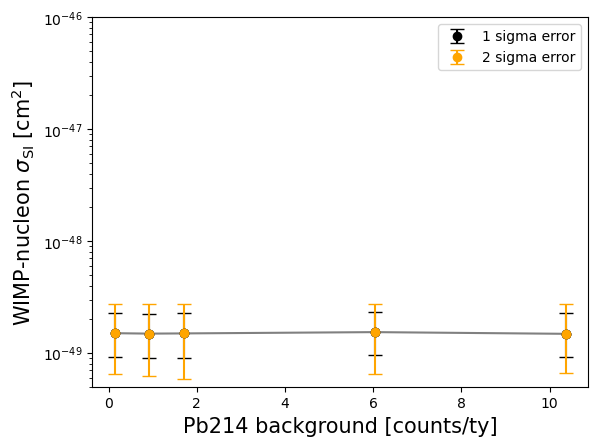

In [5]:
fig = plt.figure()
ax = fig.gca()

ax.plot(bkg_counts, sensitivies_60, color = 'grey')
ax.scatter(bkg_counts, sensitivies_60, color = 'black')
ax.errorbar(bkg_counts, sensitivies_60, yerr = y_err_1_sigma_60,  fmt='o', color = 'black', capsize = 5, label = '1 sigma error')
ax.errorbar(bkg_counts, sensitivies_60, yerr = y_err_2_sigma_60,  fmt='o', color = 'orange', capsize = 5, label = '2 sigma error')

ax.legend()
ylab = r'WIMP-nucleon $\sigma_{\rm SI}$ [cm$^2$]'
ylim = (5e-50, 1e-46)
ax.set_ylabel(ylab, fontsize=15)
ax.set_xlabel('Pb214 background [counts/ty]', fontsize=15)
ax.set_ylim(ylim)

ax.set_yscale('log')

### 1000 GeV

In [6]:
#sensitivity

sensitivity_file = '/global/cfs/cdirs/lz/users/rory_m/XLZD/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/sensitivity.txt'

data_array = np.loadtxt(sensitivity_file, delimiter="\t", skiprows=1)
sensitivies_1000 = data_array[:,2]
print(sensitivies_1000, 'sensitivies')

# 1 sigma bands

lower_band = '/global/cfs/cdirs/lz/users/rory_m/XLZD/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/1_sigma_lower.txt'
lo_array = np.loadtxt(lower_band, delimiter="\t", skiprows = 1)
lower_band_1000 = sensitivies_1000 - lo_array[:,2]

upper_band = '/global/cfs/cdirs/lz/users/rory_m/XLZD/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/1_sigma_upper.txt'
up_array = np.loadtxt(upper_band, delimiter="\t", skiprows = 1)
upper_band_1000 = up_array[:,2] - sensitivies_1000

#print(lower_band, upper_band)
y_err_1_sigma_1000 = np.vstack((lower_band_1000, upper_band_1000))

# 2 sigma bands

lower_band = '/global/cfs/cdirs/lz/users/rory_m/XLZD/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/2_sigma_lower.txt'
lo_array = np.loadtxt(lower_band, delimiter="\t", skiprows = 1)
lower_band_1000 = sensitivies_1000 - lo_array[:,2]

upper_band = '/global/cfs/cdirs/lz/users/rory_m/XLZD/FlameFitSimple/analyses/wimp_sensitivity/band_outputs/2_sigma_upper.txt'
up_array = np.loadtxt(upper_band, delimiter="\t", skiprows = 1)
upper_band_1000 = up_array[:,2] - sensitivies_1000

y_err_2_sigma_1000 = np.vstack((lower_band_1000, upper_band_1000))


#Header
with open(sensitivity_file, "r") as file:
    header_line = file.readline().strip()
    headers = header_line.split("\t")

print("Headers:", headers)

bkg_counts = np.array([0.1342, 0.9164, 1.7004, 6.0363, 10.3646])


[1.84961419e-48 1.83434637e-48 1.84615186e-48 1.88020335e-48
 1.84234870e-48] sensitivies
Headers: ['10 GeV', '60 GeV', '1000 GeV']


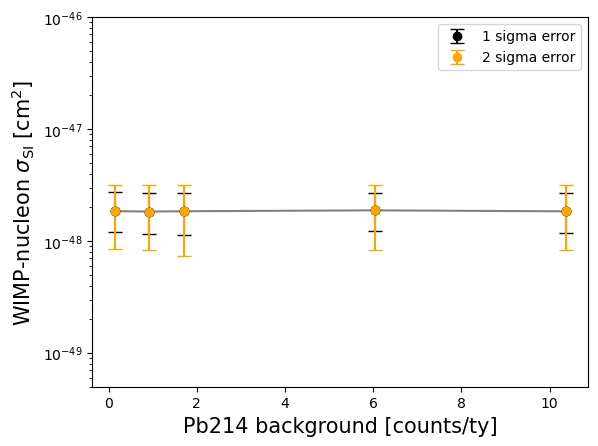

In [7]:
fig = plt.figure()
ax = fig.gca()

ax.plot(bkg_counts, sensitivies_1000, color = 'grey')
ax.scatter(bkg_counts, sensitivies_1000, color = 'black')
ax.errorbar(bkg_counts, sensitivies_1000, yerr = y_err_1_sigma_1000,  fmt='o', color = 'black', capsize = 5, label = '1 sigma error')
ax.errorbar(bkg_counts, sensitivies_1000, yerr = y_err_2_sigma_1000,  fmt='o', color = 'orange', capsize = 5, label = '2 sigma error')

ax.legend()
ylab = r'WIMP-nucleon $\sigma_{\rm SI}$ [cm$^2$]'
ylim = (5e-50, 1e-46)
ax.set_ylabel(ylab, fontsize=15)
ax.set_xlabel('Pb214 background [counts/ty]', fontsize=15)
ax.set_ylim(ylim)

ax.set_yscale('log')

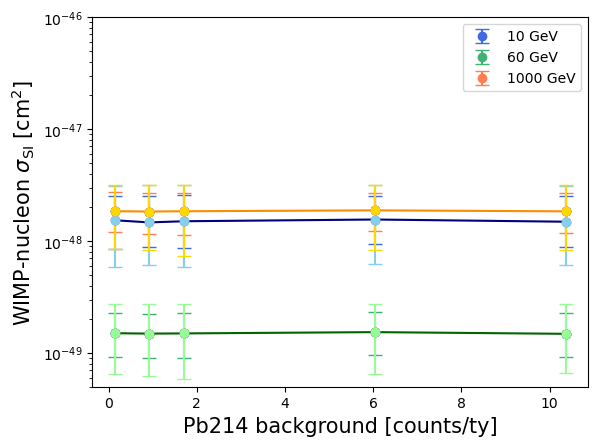

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()

# First dataset
ax.plot(bkg_counts, sensitivies, color='navy')
ax.errorbar(bkg_counts, sensitivies, yerr=y_err_1_sigma, fmt='o', color='royalblue', capsize=5, label='10 GeV')
ax.errorbar(bkg_counts, sensitivies, yerr=y_err_2_sigma, fmt='o', color='skyblue', capsize=5)

# Second dataset
ax.plot(bkg_counts, sensitivies_60, color='darkgreen')
ax.scatter(bkg_counts, sensitivies_60, color='black')
ax.errorbar(bkg_counts, sensitivies_60, yerr=y_err_1_sigma_60, fmt='o', color='mediumseagreen', capsize=5, label='60 GeV')
ax.errorbar(bkg_counts, sensitivies_60, yerr=y_err_2_sigma_60, fmt='o', color='palegreen', capsize=5)

# Third dataset
ax.plot(bkg_counts, sensitivies_1000, color='darkorange')
ax.scatter(bkg_counts, sensitivies_1000, color='black')
ax.errorbar(bkg_counts, sensitivies_1000, yerr=y_err_1_sigma_1000, fmt='o', color='coral', capsize=5, label='1000 GeV')
ax.errorbar(bkg_counts, sensitivies_1000, yerr=y_err_2_sigma_1000, fmt='o', color='gold', capsize=5)

ax.legend()
ylab = r'WIMP-nucleon $\sigma_{\rm SI}$ [cm$^2$]'
ylim = (5e-50, 1e-46)
ax.set_ylabel(ylab, fontsize=15)
ax.set_xlabel('Pb214 background [counts/ty]', fontsize=15)
ax.set_ylim(ylim)
ax.set_yscale('log')


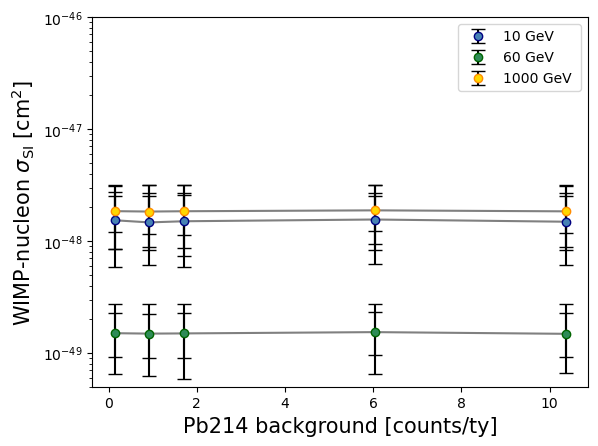

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()

# First dataset
ax.plot(bkg_counts, sensitivies, color='grey')
ax.errorbar(
    bkg_counts, sensitivies, yerr=y_err_1_sigma,
    fmt='o', mfc='steelblue', mec='navy', ecolor='black',
    capsize=5, label='10 GeV'
)
ax.errorbar(
    bkg_counts, sensitivies, yerr=y_err_2_sigma,
    fmt='none', ecolor='black', capsize=5
)

# Second dataset
ax.plot(bkg_counts, sensitivies_60, color='grey')
ax.errorbar(
    bkg_counts, sensitivies_60, yerr=y_err_1_sigma_60,
    fmt='o', mfc='seagreen', mec='darkgreen', ecolor='black',
    capsize=5, label='60 GeV'
)
ax.errorbar(
    bkg_counts, sensitivies_60, yerr=y_err_2_sigma_60,
    fmt='none', ecolor='black', capsize=5
)

# Third dataset
ax.plot(bkg_counts, sensitivies_1000, color='grey')
ax.errorbar(
    bkg_counts, sensitivies_1000, yerr=y_err_1_sigma_1000,
    fmt='o', mfc='gold', mec='darkorange', ecolor='black',
    capsize=5, label='1000 GeV '
)
ax.errorbar(
    bkg_counts, sensitivies_1000, yerr=y_err_2_sigma_1000,
    fmt='none', ecolor='black', capsize=5
)

# Labels and formatting
ax.legend()
ax.set_ylabel(r'WIMP-nucleon $\sigma_{\rm SI}$ [cm$^2$]', fontsize=15)
ax.set_xlabel('Pb214 background [counts/ty]', fontsize=15)
ax.set_ylim(5e-50, 1e-46)
ax.set_yscale('log')
